In [1]:
#pip install ipython-sql

%load_ext sql
import pandas as pd
import numpy as np

In [2]:
%sql postgresql://###

'Connected: ###'

In [3]:
SkippedQuests = %sql select question_id, count(*) as CO from answers where is_skipped=True group by question_id order by CO desc
SkippedQuests = SkippedQuests.DataFrame()

2741 rows affected.


In [ ]:
%sql select text from questions_i18n where question_id=561

In [4]:
SkippedQuests.head()

,question_id,co
0,3347,2638
1,3349,1923
2,3340,918
3,3342,707
4,3824,655


In [65]:
%%capture
QuestTexts = []

for i in range(50):
    
    QuestID = int(SkippedQuests['question_id'].loc[i])
    QT = %sql select text from questions_i18n where question_id=:QuestID
        
    if langdetect.detect(QT[0][0]) == 'en':
        QuestTexts.append(QT[0][0])
    else:
        QuestTexts.append(QT[1][0])

In [66]:
QuestTexts

["What's your political persuasion? 🗳️",
 'How much do you earn? 💰',
 'How much time have you spent in a classroom? 🎓',
 'How employed are you right now? 📝',
 'The pay cap on public sector workers should be lifted',
 "Love Island's Olivia is so relatable",
 'I follow several blogs',
 'I favour green and eco-friendly products',
 'Trump was wrong to pull out of the Paris Climate Agreement',
 'I participate in online forums',
 'I love sharing selfies',
 'How many birthdays have you had? 🎂',
 'Who do you live with? 👪',
 'I consider myself good at cracking jokes',
 "How's your love life? ❤️",
 'I use Twitter',
 'I buy groceries in bulk to save money',
 'I use LinkedIn',
 "What's your crib like? 🏡",
 'I keep myself fit',
 'I was sad to hear about Reema Lagoo',
 'Nadal is the best tennis player of all time',
 'Donald Trump is modern day presidential',
 'I regularly update my social media',
 'I share photos on social media most days',
 "I'm happy with the result of the UK elections",
 'How man

In [74]:
A = pd.DataFrame(data=SkippedQuests['co'][:25].get_values(), index=QuestTexts[:25], columns=['Count'])

In [75]:
A

,Count
What's your political persuasion? 🗳️,2638
How much do you earn? 💰,1923
How much time have you spent in a classroom? 🎓,918
How employed are you right now? 📝,707
The pay cap on public sector workers should be lifted,655
Love Island's Olivia is so relatable,604
I follow several blogs,462
I favour green and eco-friendly products,344
Trump was wrong to pull out of the Paris Climate Agreement,344
I participate in online forums,337


In [46]:
import matplotlib.pyplot as plt

%matplotlib inline

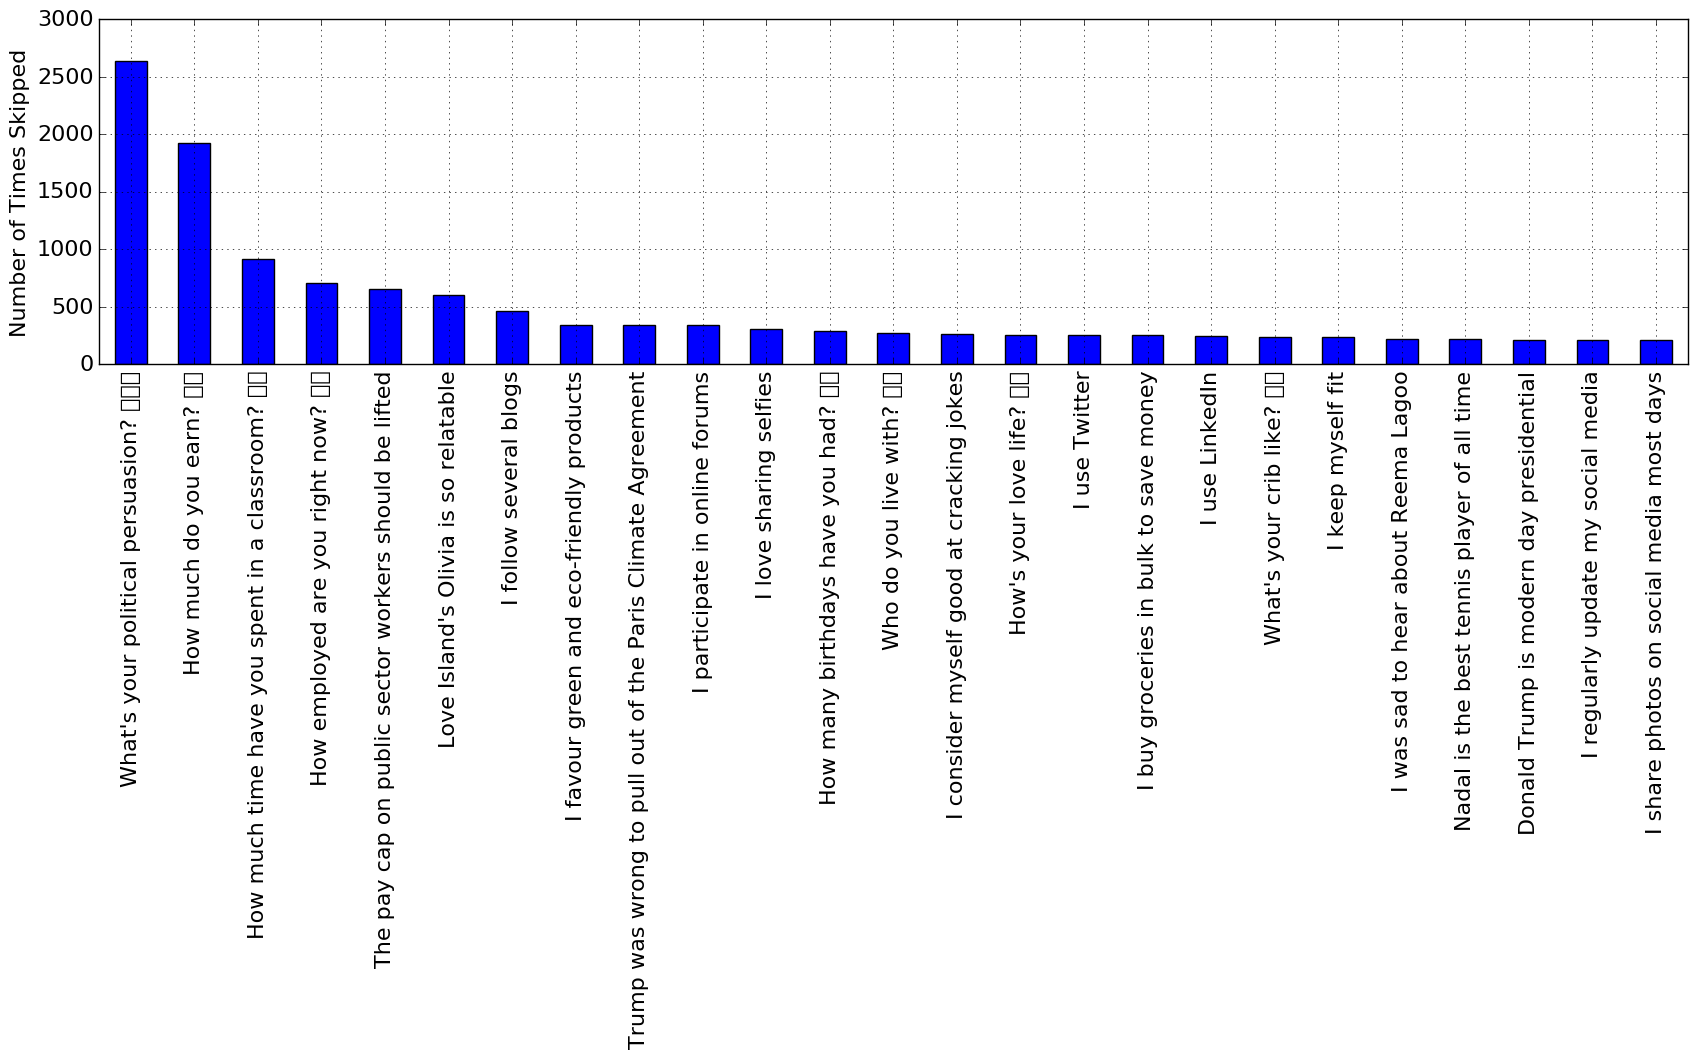

In [76]:
A.plot(kind='bar', grid=True, legend=False)
B = plt.gcf()
plt.ylabel('Number of Times Skipped')
plt.gcf().subplots_adjust(bottom=0.6)

plt.rc('font', size=16)          # controls default text sizes
plt.rc('axes', titlesize=16)     # fontsize of the axes title
plt.rc('axes', labelsize=16)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
plt.rc('ytick', labelsize=16)    # fontsize of the tick labels

B.set_size_inches(20.5, 11.5)
B.savefig(r'.\Desktop\SkippedQuest.png')

In [58]:
import langdetect